In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
t = yf.Ticker('AAPL')
df = t.history(period='max')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087116,0.087116,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0


In [3]:
date_string = "2023-12-31"
date_object = pd.to_datetime(date_string)
date_with_timezone = date_object.tz_localize('America/New_York')

train_start_date = "2010-1-1"
train_start_date_object = pd.to_datetime(train_start_date)
train_date_with_timezone = date_object.tz_localize('America/New_York')
train_data = df[(df.index >= train_start_date) & (df.index <= date_with_timezone)]

test_data = df[df.index > date_with_timezone]

In [4]:
train_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.453203,6.485555,6.421456,6.470740,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.488580,6.518514,6.447762,6.481928,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.481928,6.507629,6.372173,6.378825,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.402407,6.409966,6.320771,6.367031,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.358566,6.409967,6.321074,6.409362,447610800,0.0,0.0


In [5]:
test_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,186.911482,188.199846,183.655642,185.403412,82488700,0.0,0.0
2024-01-03 00:00:00-05:00,183.985237,185.643125,183.196235,184.015198,58414500,0.0,0.0
2024-01-04 00:00:00-05:00,181.917861,182.856666,180.649491,181.678177,71983600,0.0,0.0
2024-01-05 00:00:00-05:00,181.758077,182.527085,179.940389,180.949097,62303300,0.0,0.0
2024-01-08 00:00:00-05:00,181.857938,185.363474,181.268693,185.323517,59144500,0.0,0.0


In [6]:
def bollinger_bands(df, n, m):
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    data = TP
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std()
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [7]:
rolling_window = 20
standard_deviations = 2
df = bollinger_bands(train_data, 20, 2)

In [8]:
df.head(40)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,B_MA,BU,BL
Date,,,,,,,,,,
2010-01-04 00:00:00-05:00,6.453203,6.485555,6.421456,6.470740,493729600,0.0,0.0,NaN,NaN,NaN
2010-01-05 00:00:00-05:00,6.488580,6.518514,6.447762,6.481928,601904800,0.0,0.0,NaN,NaN,NaN
2010-01-06 00:00:00-05:00,6.481928,6.507629,6.372173,6.378825,552160000,0.0,0.0,NaN,NaN,NaN
2010-01-07 00:00:00-05:00,6.402407,6.409966,6.320771,6.367031,477131200,0.0,0.0,NaN,NaN,NaN
2010-01-08 00:00:00-05:00,6.358566,6.409967,6.321074,6.409362,447610800,0.0,0.0,NaN,NaN,NaN
2010-01-11 00:00:00-05:00,6.434157,6.440204,6.302632,6.352823,462229600,0.0,0.0,NaN,NaN,NaN
2010-01-12 00:00:00-05:00,6.325004,6.342541,6.241252,6.280558,594459600,0.0,0.0,NaN,NaN,NaN
2010-01-13 00:00:00-05:00,6.285095,6.377616,6.171107,6.369150,605892000,0.0,0.0,NaN,NaN,NaN
2010-01-14 00:00:00-05:00,6.352823,6.363405,6.319866,6.332262,432894000,0.0,0.0,NaN,NaN,NaN


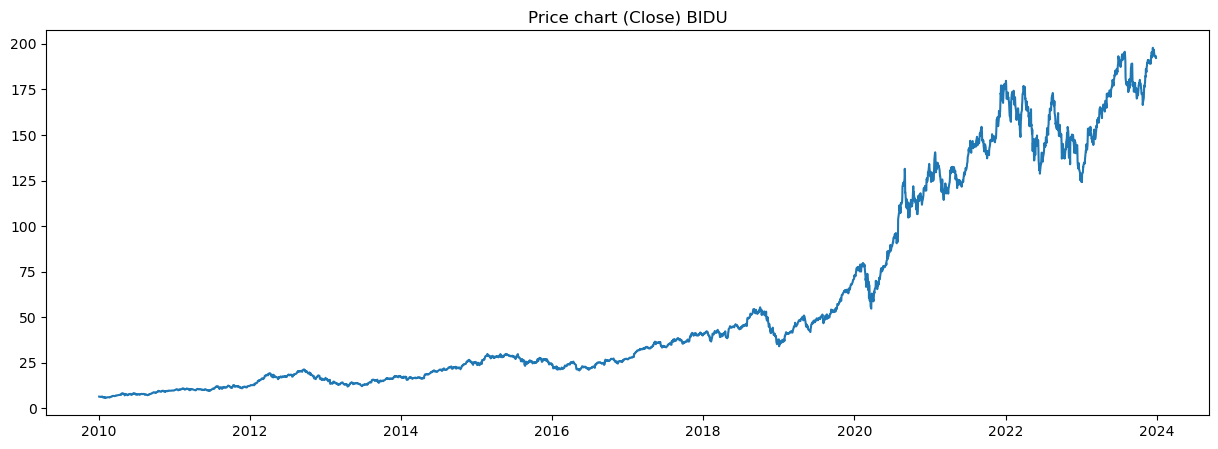

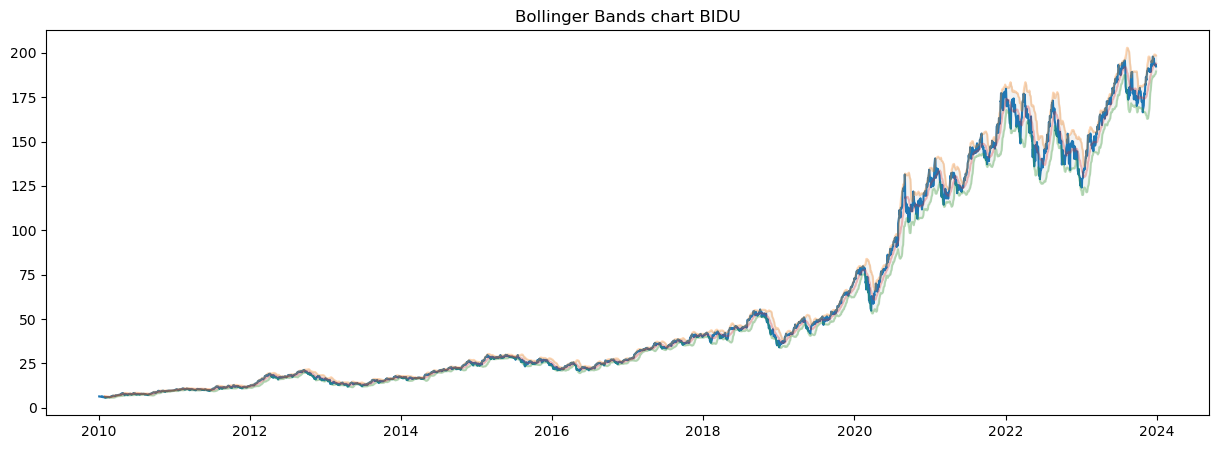

In [9]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close'])
# plt.title('Price chart (Close) ' + str(ticker))
plt.title('Price chart (Close) ' + 'BIDU')
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
# plt.title('Bollinger Bands chart ' + str(ticker))
plt.title('Bollinger Bands chart ' + 'BIDU')
plt.plot(df.index, df['Close'])
plt.plot(df.index, df['BU'], alpha=0.3)
plt.plot(df.index, df['BL'], alpha=0.3)
plt.plot(df.index, df['B_MA'], alpha=0.3)
plt.fill_between(df.index, df['BU'], df['BL'], color='grey', alpha=0.1)

plt.show()

In [10]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Volume': 'mean'}

df_agg = df.resample('W').agg(agg_dict)
df_agg = df_agg.reset_index()

In [11]:
df_agg.head(40)

,Date,Open,High,Low,Close,Volume
0,2010-01-10 00:00:00-05:00,6.453203,6.518514,6.320771,6.409362,5.145073e+08
1,2010-01-17 00:00:00-05:00,6.434157,6.440204,6.171107,6.226436,5.379086e+08
2,2010-01-24 00:00:00-05:00,6.299001,6.517304,5.961271,5.979109,7.080206e+08
3,2010-01-31 00:00:00-05:00,6.123031,6.461671,5.752341,5.807068,1.414967e+09
4,2010-02-07 00:00:00-05:00,5.816440,6.053187,5.770483,5.909870,7.343011e+08
5,2010-02-14 00:00:00-05:00,5.916824,6.096725,5.865725,6.058628,5.374667e+08
6,2010-02-21 00:00:00-05:00,6.105796,6.177456,6.073142,6.097631,4.546073e+08
7,2010-02-28 00:00:00-05:00,6.117890,6.203459,5.917428,6.186829,5.197623e+08
8,2010-03-07 00:00:00-05:00,6.220994,6.642783,6.211923,6.620106,5.508709e+08
9,2010-03-14 00:00:00-05:00,6.652155,6.885576,6.588055,6.851410,5.536782e+08


In [12]:
df_agg = bollinger_bands(df_agg, 20, 2)

In [13]:
def add_signal(df):
    buy_list = []
    sell_list = []
    for i in range(len(df['Close'])):
        #if df['Close'][i] > df['BU'][i]:           # sell signal     daily
        if df['High'][i] > df['BU'][i]:             # sell signal     weekly
            buy_list.append(np.nan)
            sell_list.append(df['Close'][i])
        #elif df['Close'][i] < df['BL'][i]:         # buy signal      daily
        elif df['Low'][i] < df['BL'][i]:            # buy signal      weekly
            buy_list.append(df['Close'][i])
            sell_list.append(np.nan)  
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
         
    buy_list = pd.Series(buy_list, name='Buy')
    sell_list = pd.Series(sell_list, name='Sell')
        
    df = df.join(buy_list)
    df = df.join(sell_list)        
     
    return df

In [14]:
def plot_signals(df, ticker):
    # plot price
    plt.figure(figsize=(15,5))
    plt.plot(df['Date'], df['Close'])
    plt.title('Price chart (Close) ' + str(ticker))
    plt.show()

    # plot  values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('Bollinger Bands chart ' + str(ticker))
    plt.plot(df['Date'], df['Close'], label='Close')

    plt.plot(df['Date'], df['High'], label='High', alpha=0.3)
    plt.plot(df['Date'], df['Low'], label='Low', alpha=0.3)

    plt.plot(df['Date'], df['BU'], label='B_Upper', alpha=0.3)
    plt.plot(df['Date'], df['BL'], label='B_Lower', alpha=0.3)
    plt.plot(df['Date'], df['B_MA'], label='B_SMA', alpha=0.3)
    plt.fill_between(df['Date'], df['BU'], df['BL'], color='grey', alpha=0.1)

    plt.scatter(df['Date'], df['Buy'], label='Buy', marker='^')
    plt.scatter(df['Date'], df['Sell'], label='Sell', marker='v')

    plt.legend()

    plt.show()

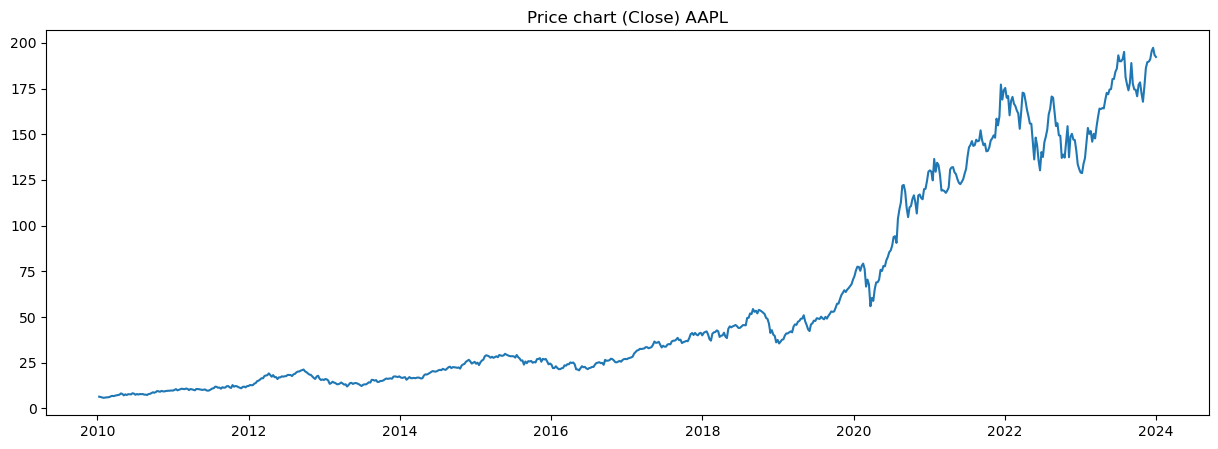

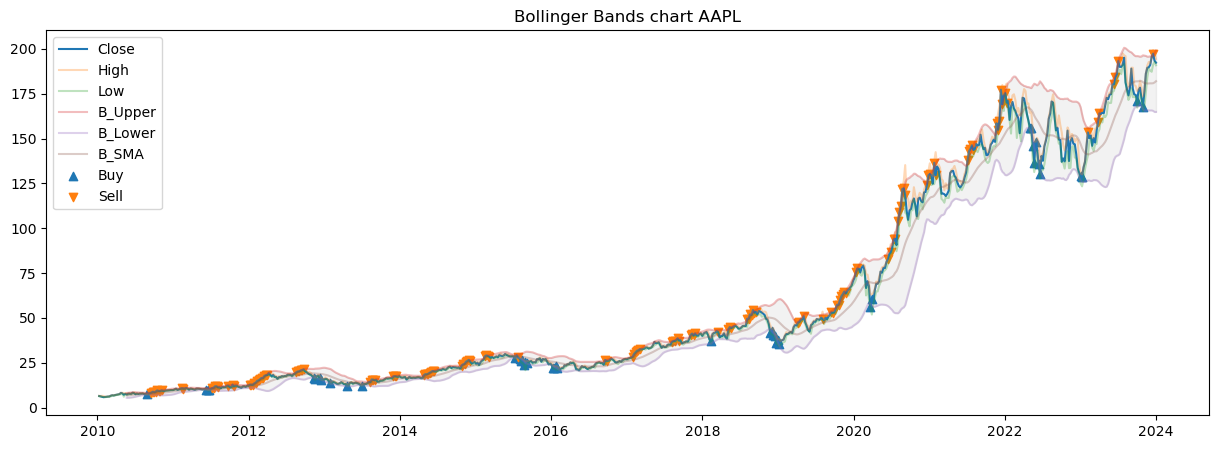

In [15]:
df_agg = add_signal(df_agg)
plot_signals(df_agg, 'AAPL')